In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

In [18]:
# 电影信息
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table("movies.dat",sep = '::',header=None,names=mnames,engine='python')

# 电影排名
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
rating = pd.read_table("ratings.dat",sep = '::',header=None,names=rnames,engine='python')

# 用户信息
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
user = pd.read_table("users.dat",sep = '::',header=None,names=unames,engine='python')

In [19]:
rating=pd.merge(rating, movies, on='movie_id' , how='left')


In [20]:
rating['genres']=rating['genres'].str.split('|')

In [21]:
x=movies["genres"].copy()
for i in range(len(x)):
    x[i]=x[i].split('|')

In [22]:
movies["genres"]=x

In [23]:
unique_genre = movies['genres'].explode().unique()
unique_genre 

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [24]:
# Get the count of each genre
genre_distribution = movies['genres'].explode().value_counts()

# Make a dict assigning an index to a genre
genre_dict = {k: v for v, k in enumerate(unique_genre)}
genre_dict

{'Animation': 0,
 "Children's": 1,
 'Comedy': 2,
 'Adventure': 3,
 'Fantasy': 4,
 'Romance': 5,
 'Drama': 6,
 'Action': 7,
 'Crime': 8,
 'Thriller': 9,
 'Horror': 10,
 'Sci-Fi': 11,
 'Documentary': 12,
 'War': 13,
 'Musical': 14,
 'Mystery': 15,
 'Film-Noir': 16,
 'Western': 17}

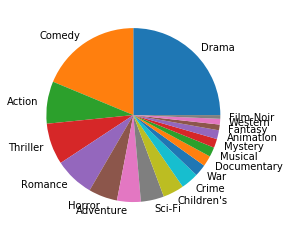

In [25]:
plt.pie(genre_distribution.values, labels = genre_distribution.keys())
plt.show()

In [26]:
movies['movie_vector'] = ""
for ind, row in movies.iterrows():
    genres = row.genres
    movie_vector = np.zeros(len(genre_dict))

    for g in genres:
        movie_vector[genre_dict[g]] = 1
    movies.at[ind, 'movie_vector'] = movie_vector

In [27]:
movies.head()

,movie_id,title,genres,movie_vector
0,1,Toy Story (1995),"[Animation, Children's, Comedy]","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]","[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,5,Father of the Bride Part II (1995),[Comedy],"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [28]:
Alldata = pd.merge(rating,movies,on='movie_id')
Alldata

,user_id,movie_id,rating,timestamp,title_x,genres_x,title_y,genres_y,movie_vector
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),[Drama],One Flew Over the Cuckoo's Nest (1975),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),[Drama],One Flew Over the Cuckoo's Nest (1975),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),[Drama],One Flew Over the Cuckoo's Nest (1975),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),[Drama],One Flew Over the Cuckoo's Nest (1975),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),[Drama],One Flew Over the Cuckoo's Nest (1975),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),[Documentary],Modulations (1998),[Documentary],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1000205,5675,2703,3,976029116,Broken Vessels (1998),[Drama],Broken Vessels (1998),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1000206,5780,2845,1,958153068,White Boys (1999),[Drama],White Boys (1999),[Drama],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1000207,5851,3607,5,957756608,One Little Indian (1973),"[Comedy, Drama, Western]",One Little Indian (1973),"[Comedy, Drama, Western]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [29]:
data=Alldata.copy()

In [30]:
data=data[["user_id","movie_id","rating","movie_vector","genres_x"]]

In [31]:
data

,user_id,movie_id,rating,movie_vector,genres_x
0,1,1193,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
1,2,1193,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
2,12,1193,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
3,15,1193,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
4,17,1193,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
...,...,...,...,...,...
1000204,5949,2198,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Documentary]
1000205,5675,2703,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
1000206,5780,2845,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
1000207,5851,3607,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[Comedy, Drama, Western]"



user_ids = data['user_id'].unique()
user_df = pd.DataFrame(columns=['user_id', 'user_vector', 'avg_rating', 'num_movies_rated'])
                       
for user_id in user_ids:
    print(user_id)
    user_rating_df = data[(data['user_id'] == user_id)]
#     print(user_rating_df)

    user_vector = np.zeros(len(genre_dict))
    count_vector = np.zeros(len(genre_dict))
    
    user_avg_rating = 0
    movies_rated_count = 0
    
    for _, row in user_rating_df.iterrows():
        user_avg_rating += row.rating 
        movies_rated_count += 1
        genres = row.genres_x

        user_movie_vector = np.zeros(len(genre_dict))
        
        for g in genres:
            user_movie_vector[genre_dict[g]] = 1
            count_vector[genre_dict[g]] += 1
            
        user_vector += user_movie_vector*row.rating

    count_vector = np.where(count_vector==0, 1, count_vector)
    user_vector = np.divide(user_vector, count_vector)
    user_avg_rating /= movies_rated_count
    row_df = pd.DataFrame([[user_id, user_vector, user_avg_rating, movies_rated_count]], 
                          columns=['user_id', 'user_vector', 'avg_rating', 'num_movies_rated'])
#     print(row_df)
#    user_df = pd.concat([user_df, row_df], ignore_index=True)
    user_df = pd.concat([user_df,row_df], ignore_index=True)

user_df

In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = False)

In [ ]:
for train_index, test_index in kf.split(data):  # data1就是所用的数据集
    data_train=data.iloc[train_index[:]]
    data_test=data.iloc[test_index[:]]
    
    user_ids = data_train['user_id'].unique()
    user_df = pd.DataFrame(columns=['user_id', 'user_vector', 'avg_rating', 'num_movies_rated'])
                       
    for user_id in user_ids:
        #print(user_id)
        user_rating_df = data_train[(data_train['user_id'] == user_id)]
#     print(user_rating_df)

        user_vector = np.zeros(len(genre_dict))
        count_vector = np.zeros(len(genre_dict))
    
        user_avg_rating = 0
        movies_rated_count = 0
        
        for _, row in user_rating_df.iterrows():
            user_avg_rating += row.rating 
            movies_rated_count += 1
            genres = row.genres_x
    
            user_movie_vector = np.zeros(len(genre_dict))
            
            for g in genres:
                user_movie_vector[genre_dict[g]] = 1
                count_vector[genre_dict[g]] += 1
            
            user_vector += user_movie_vector*row.rating

        count_vector = np.where(count_vector==0, 1, count_vector)
        user_vector = np.divide(user_vector, count_vector)
        user_avg_rating /= movies_rated_count
        row_df = pd.DataFrame([[user_id, user_vector, user_avg_rating, movies_rated_count]], 
                          columns=['user_id', 'user_vector', 'avg_rating', 'num_movies_rated'])

        user_df = pd.concat([user_df,row_df], ignore_index=True)
        
    algo_predictions = pd.DataFrame(columns=['user_id', 'movieId', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
    for ind, row in data_test.iterrows():
        #print("row=" + row)
        userId = row['user_id']
        movieId = row['movie_id']
        og_rating = row['rating']
        
        try:
            user_vector = user_df[user_df['user_id'] == int(userId)].user_vector.values[0]
            movie_vector = data[data['movie_id'] == int(movieId)].movie_vector.values[0]

            predicted_rating = user_vector*movie_vector
        
            if predicted_rating.any():
                predicted_rating = np.nanmean(np.where(predicted_rating!=0, predicted_rating, np.nan)) 
            else:
                predicted_rating = 0
    
            row_df = pd.DataFrame([[user_id, movieId, user_vector, movie_vector, og_rating, predicted_rating]], 
                        columns=['user_id', 'movie_id', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
            algo_predictions = pd.concat([algo_predictions, row_df], ignore_index=True)
        except:
            print("User not found: ", user_id)
    rmse = ((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2).mean() ** .5
    print(rmse)
    mae = (((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2) ** .5).mean()
    print(mae)
    

In [ ]:
algo_predictions = pd.DataFrame(columns=['user_id', 'movieId', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
    for ind, row in rating.iterrows():
        userId = row['user_id']
        movieId = row['movie_id']
        og_rating = row['rating']
    
        try:
            user_vector = user_df[user_df['user_id'] == int(userId)].user_vector.values[0]
            movie_vector = movies[movies['movie_id'] == int(movieId)].movie_vector.values[0]

            predicted_rating = user_vector*movie_vector
        
            if predicted_rating.any():
                predicted_rating = np.nanmean(np.where(predicted_rating!=0, predicted_rating, np.nan)) 
            else:
                predicted_rating = 0
    
            row_df = pd.DataFrame([[userId, movieId, user_vector, movie_vector, og_rating, predicted_rating]], 
                    columns=['user_id', 'movie_id', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
            algo_predictions = pd.concat([algo_predictions, row_df], ignore_index=True)
        except:
            print("User not found: ", userId)
    rmse = ((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2).mean() ** .5
    rmse
    mae = (((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2) ** .5).mean()
    mae